In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sb
sb.set()
import statsmodels.api as sm

In [192]:
raw_data = pd.read_csv('Raw_Data.csv')

In [193]:
raw_data.columns.tolist()

['governorate',
 'building_type',
 'rooms',
 'season',
 'month',
 'city',
 'temperature',
 'price_per_kwh',
 'tax_rate',
 'consumption_kwh',
 'bill_amount']

In [194]:
raw_data.sample(10)

,governorate,building_type,rooms,season,month,city,temperature,price_per_kwh,tax_rate,consumption_kwh,bill_amount
658,Sharqia,Apartment,2,Autumn,10.0,10th of Ramadan,24.50,0.7522,0.1133,238.86,200.05
14264,Luxor,Apartment,1,Summer,7.0,Esna,35.10,0.7212,0.0762,136.40,105.88
16441,Luxor,Apartment,1,Summer,7.0,Luxor City,39.24,0.7125,0.0642,201.87,153.06
20986,Cairo,Office,2,Summer,6.0,New Cairo,30.44,1.1099,0.1303,381.24,478.28
13605,Luxor,Apartment,1,Winter,12.0,Esna,25.62,0.7438,0.0724,142.96,114.04
10624,Beheira,Office,5,Spring,5.0,Damanhour,24.15,1.0121,0.0968,580.72,644.59
29818,Sharqia,Apartment,4,Spring,5.0,Zagazig,22.22,0.7887,0.1013,408.37,354.71
13301,Cairo,Apartment,2,Spring,4.0,Nasr City,22.60,0.8542,0.1273,275.13,264.93
3435,Dakahlia,Villa,9,Summer,7.0,Mansoura,30.62,0.8891,0.0944,949.21,923.61
535,Luxor,Villa,6,Spring,5.0,El Qurna,30.56,0.8838,0.0713,826.89,782.91


In [195]:
raw_data.describe(include='all')          # general stats for all columns

,governorate,building_type,rooms,season,month,city,temperature,price_per_kwh,tax_rate,consumption_kwh,bill_amount
count,30000,29572,30000.000000,29750,29900.000000,29850,29970.000000,29980.000000,30000.000000,29940.000000,30000.000000
unique,10,3,NaN,4,NaN,37,NaN,NaN,NaN,NaN,NaN
top,Giza,Apartment,NaN,Summer,NaN,Kafr El Dawwar,NaN,NaN,NaN,NaN,NaN
freq,3046,20782,NaN,7523,NaN,1508,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.882667,NaN,6.527090,NaN,25.703118,0.825189,0.105961,350.385337,330.904916
std,NaN,NaN,1.664670,NaN,3.464705,NaN,5.323063,0.086975,0.021733,203.191322,217.403567
min,NaN,NaN,1.000000,NaN,1.000000,NaN,9.440000,0.654800,0.058800,89.180000,78.270000
25%,NaN,NaN,2.000000,NaN,3.000000,NaN,22.020000,0.759700,0.089500,209.990000,179.577500
50%,NaN,NaN,3.000000,NaN,7.000000,NaN,25.620000,0.800900,0.106100,279.965000,242.485000
75%,NaN,NaN,4.000000,NaN,10.000000,NaN,29.500000,0.876500,0.122900,426.307500,431.385000


In [196]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   governorate      30000 non-null  object 
 1   building_type    29572 non-null  object 
 2   rooms            30000 non-null  int64  
 3   season           29750 non-null  object 
 4   month            29900 non-null  float64
 5   city             29850 non-null  object 
 6   temperature      29970 non-null  float64
 7   price_per_kwh    29980 non-null  float64
 8   tax_rate         30000 non-null  float64
 9   consumption_kwh  29940 non-null  float64
 10  bill_amount      30000 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.5+ MB


<Axes: >

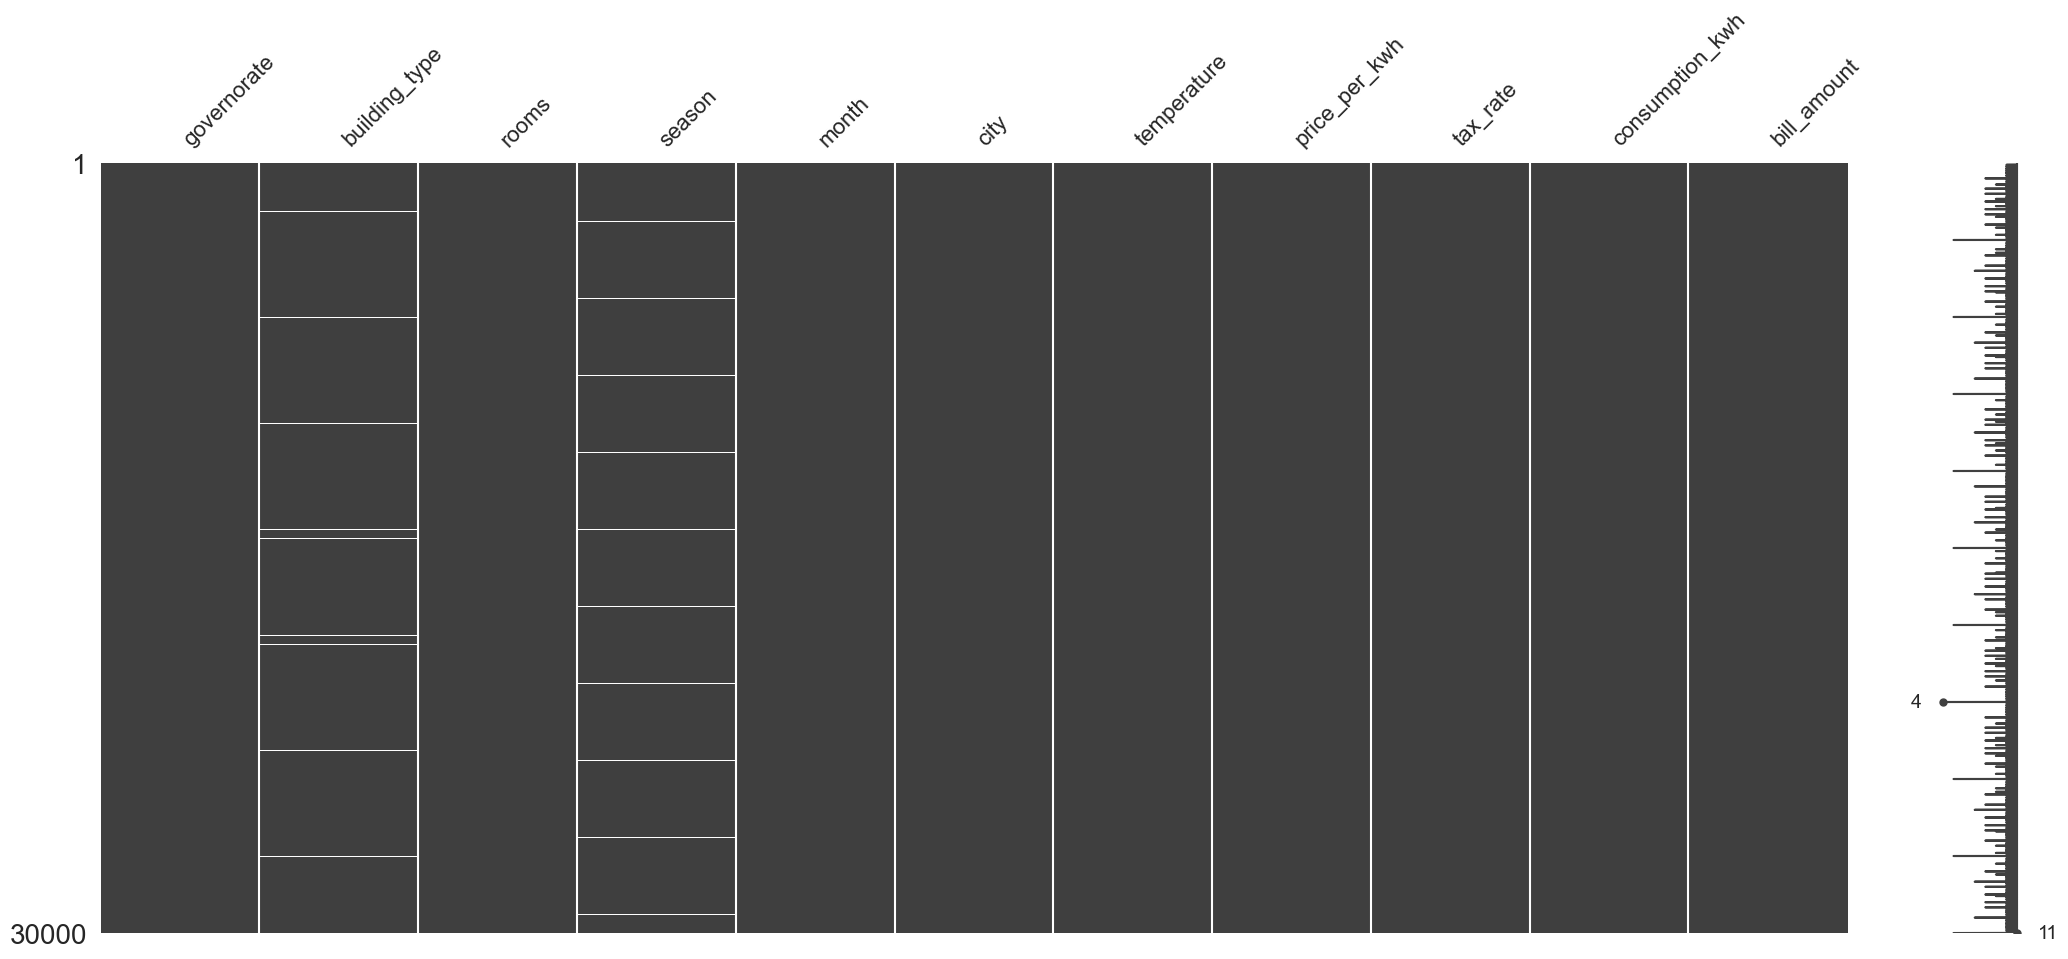

In [197]:
import missingno as mi
mi.matrix(raw_data)

In [198]:
raw_data.isnull().sum()

governorate          0
building_type      428
rooms                0
season             250
month              100
city               150
temperature         30
price_per_kwh       20
tax_rate             0
consumption_kwh     60
bill_amount          0
dtype: int64

In [199]:
i = 0
for month in raw_data['month']:
    i += 1
    if i % 300 == 0:
        raw_data.at[i, 'month'] = None